In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
import graphviz

In this example we will use a dataset included in the scikit-learn library - Iris plants dataset. 

In [2]:
data = load_iris()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
x = pd.DataFrame(data.data, columns=data.feature_names)

In [7]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = pd.DataFrame(data.target, columns=['Species'])

In [9]:
tree = DecisionTreeClassifier(max_depth=2)

In [10]:
tree.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
source = graphviz.Source(export_graphviz(tree))

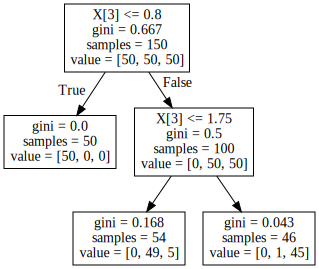

In [12]:
source

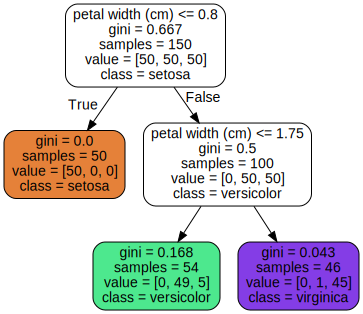

In [13]:
graphviz.Source(export_graphviz(tree, feature_names=x.columns, class_names=data.target_names,
                               filled=True, rounded=True))

### Understanding How a Tree Makes a Split
To determine which feature to use to make the first split — that is, to make the root node — the algorithm chooses a feature and makes a split. It then looks at the subsets and measures their impurity using the gini score. It does this for multiple thresholds and determines that the best split for the given feature is the one that produces the purest subsets. This is repeated for all the features in the training set. Ultimately, the root node is determined by the feature that produces a split with purest subsets. Once the root node is decided, the tree is grown to a depth of one. The same process is repeated for the other nodes in the tree.

In [14]:
sample_one_pred = tree.predict([[5, 5, 1, 3]])

In [15]:
data.target_names[sample_one_pred]

array(['virginica'], dtype='<U10')

In [16]:
sample_two_pred = tree.predict([[5, 5, 2.6, 1.5]])

In [17]:
data.target_names[sample_two_pred]

array(['versicolor'], dtype='<U10')

**criterion** : This parameter determines how the impurity of a split will be measured. The default value is “gini” but you can also use “entropy” as a metric for impurity.


**splitter**: This is how the decision tree searches the features for a split. The default value is set to “best”. That is, for each node, the algorithm considers all the features and chooses the best split. If you decide to set the splitter parameter to “random,” then a random subset of features will be considered. The split will then be made by the best feature within the random subset. The size of the random subset is determined by the max_features parameter. This is partly where a Random Forest gets its name.

**max_depth**: This determines the maximum depth of the tree. In our case, we use a depth of two to make our decision tree. The default value is set to none. This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting. Below is an example of an over-fitted tree.

In [18]:
tree2 = DecisionTreeClassifier()

In [19]:
tree2.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

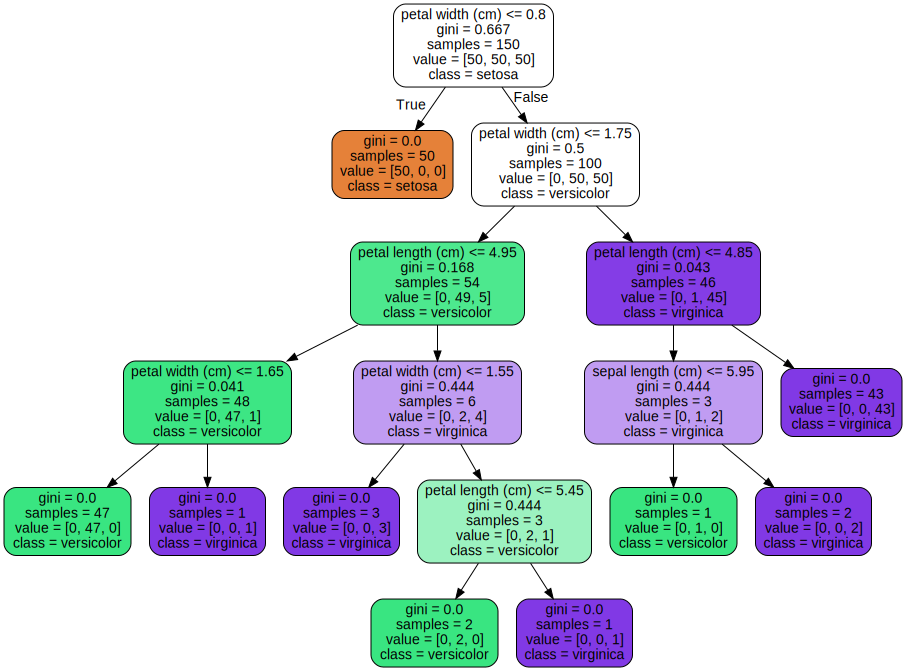

In [20]:
graphviz.Source(export_graphviz(tree2, feature_names=x.columns, class_names=data.target_names,
                               filled=True, rounded=True))

**min_samples_split**: The minimum number of samples a node must contain in order to consider splitting. The default value is two. You can use this parameter to regularize your tree.

**min_samples_leaf**: The minimum number of samples needed to be considered a leaf node. The default value is set to one. Use this parameter to limit the growth of the tree.

**max_features**: The number of features to consider when looking for the best split. If this value is not set, the decision tree will consider all features available to make the best split. Depending on your application, it’s often a good idea to tune this parameter. Here is an article that recommends how to set max_features.